In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [6]:
data = {
    'Feature 1': [4, 1, 9, 7, 10, 12, 14, 8],
    'Feature 2': [1, 2, 14, 5, 16, 18, 10, 10]
}

data = pd.DataFrame(data)
data.head()

,Feature 1,Feature 2
0,4,1
1,1,2
2,9,14
3,7,5
4,10,16


In [7]:
data

,Feature 1,Feature 2
0,4,1
1,1,2
2,9,14
3,7,5
4,10,16
5,12,18
6,14,10
7,8,10


In [8]:
data.describe()

,Feature 1,Feature 2
count,8.000000,8.000000
mean,8.125000,9.500000
std,4.189698,6.369571
min,1.000000,1.000000
25%,6.250000,4.250000
50%,8.500000,10.000000
75%,10.500000,14.500000
max,14.000000,18.000000


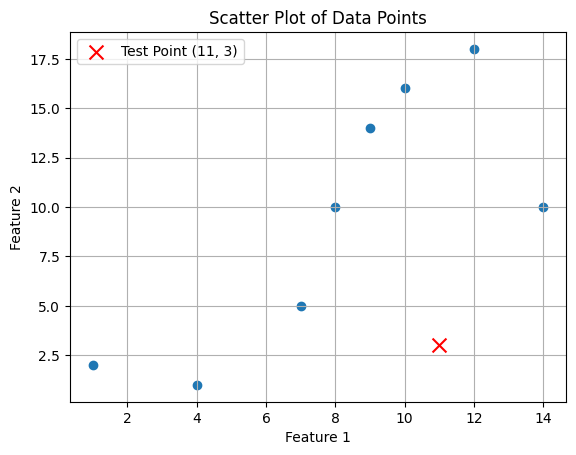

In [12]:

plt.scatter(data['Feature 1'], data['Feature 2'])

plt.scatter(11, 3, color='red', marker='x', s=100, label='Test Point (11, 3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)
plt.show()

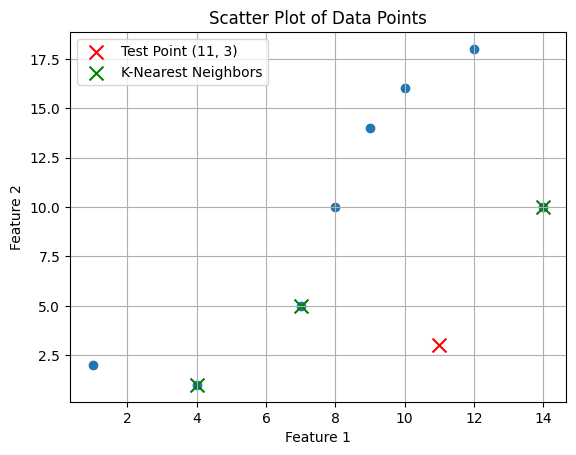

In [15]:
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return distance ** 0.5

def compute_knn_from_scratch(X, test_point, k):
    distances = []
    for i in range(len(X)):
        distance = euclidean_distance(X[i], test_point)
        distances.append((distance, i))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(X[distances[i][1]])
    return neighbors

test_point = [11, 3]
k = 3
knn = compute_knn_from_scratch(data.values, test_point, k)
knn
plt.scatter(data['Feature 1'], data['Feature 2'])
plt.scatter(11, 3, color='red', marker='x', s=100, label='Test Point (11, 3)')
x_cordinates = [point[0] for point in knn]
y_cordinates = [point[1] for point in knn]
plt.scatter(x_cordinates, y_cordinates, color='green', marker='x', s=100, label='K-Nearest Neighbors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


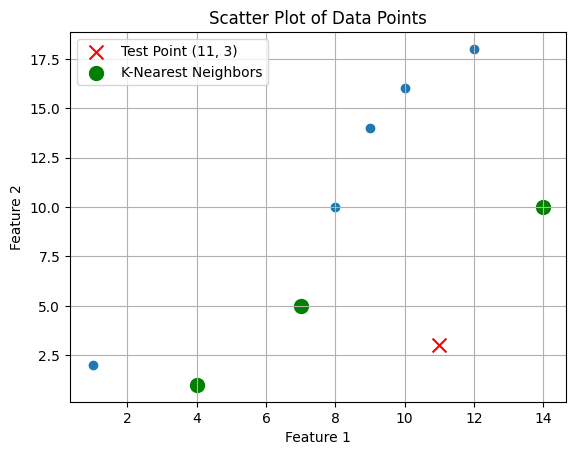

In [21]:

# Fit the model
knn = NearestNeighbors(n_neighbors=3, algorithm='auto')
knn.fit(data)
distances, indices = knn.kneighbors([test_point])
plt.scatter(data['Feature 1'], data['Feature 2'])
plt.scatter(11, 3, color='red', marker='x', s=100, label='Test Point (11, 3)')

x_cordinates = [data['Feature 1'][i] for i in indices[0]]
y_cordinates = [data['Feature 2'][i] for i in indices[0]]

plt.scatter(x_cordinates, y_cordinates, color='green', marker='o', s=100, label='K-Nearest Neighbors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)
plt.show()

Exercice 2:

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [23]:
irisdataset = load_iris()
X = irisdataset.data
y = irisdataset.target
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [27]:
observations = np.array([
    [5.4, 3.3, 5.9, 1.1],
    [1, 1, 1, 1]
])
predictions = knn.predict(observations)
print(predictions)
predicted_class_names = [irisdataset.target_names[i] for i in predictions]
print(predicted_class_names)

[2 0]
['virginica', 'setosa']


In [29]:
#parameter tuning to find the best number o nearest neighbors that has the best score
def calculate_accuracy(X,y,k):
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X,y)
   y_pred = knn.predict(X)
   return accuracy_score(y,y_pred)

def find_best_k(X,y,min_k,max_k):
   best_k = 0
   best_accuracy = 0
   accuracy_scores = []
   for k in range(min_k,max_k+1):
       accuracy = calculate_accuracy(X,y,k)
       accuracy_scores.append(accuracy)
       if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
   return best_k,best_accuracy,accuracy_scores

Best K:15
Best Accuracy:0.9867


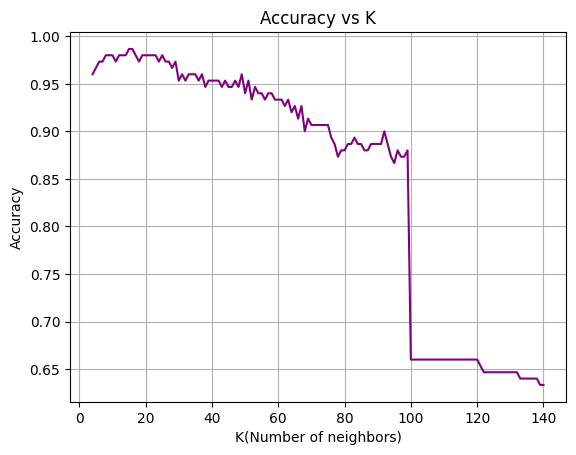

In [32]:
#the process
best_k , best_accuracy , accuracy_scores = find_best_k(X,y,4,140)
print(f"Best K:{best_k}")
print(f"Best Accuracy:{best_accuracy:.4f}")
#plot the curve of tracking the best K
k_values = range(4,141)
#plot the curve
plt.plot(k_values, accuracy_scores,color='purple')
plt.xlabel('K(Number of neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.grid(True)
plt.show()